<a href="https://colab.research.google.com/github/salonisngh/cognitive-computing/blob/main/Assignment_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import nltk
import re
import string
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, LancasterStemmer, WordNetLemmatizer
from nltk import FreqDist

# Download required resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

Q1.  Write a unique paragraph (5-6 sentences) about your favorite topic (e.g., sports, technology, food, books, etc.).
1.	Convert text to lowercase and remove punctuation using re.
2.	Tokenize the text into words and sentences.
3.	Split using split() and word_tokenize() and compare how Python split and NLTK’s word_tokenize() differ.
4.	Remove stopwords (using NLTK's stopwords list).
5.	Display word frequency distribution (excluding stopwords).


In [8]:
paragraph="In water, I feel light, like I’m floating through the sky.The world goes silent, and all my worries pass by. It keeps me strong, calm, and clears my mind, that’s why I love swimming — it’s my peace I find"

text = re.sub(r'[^\w\s]', '', paragraph.lower())

words = word_tokenize(text)
sentences = sent_tokenize(paragraph)


split_words = text.split()
print("Split words:", split_words[:20])
print("Word_tokenize:", words[:20])
print("Difference:", set(split_words) - set(words))

stop_words = set(stopwords.words('english'))
filtered_words = [word for word in words if word not in stop_words]


word_freq = FreqDist(filtered_words)
print("\nWord Frequency Distribution (excluding stopwords):")
word_freq.most_common()


Split words: ['in', 'water', 'i', 'feel', 'light', 'like', 'im', 'floating', 'through', 'the', 'skythe', 'world', 'goes', 'silent', 'and', 'all', 'my', 'worries', 'pass', 'by']
Word_tokenize: ['in', 'water', 'i', 'feel', 'light', 'like', 'im', 'floating', 'through', 'the', 'skythe', 'world', 'goes', 'silent', 'and', 'all', 'my', 'worries', 'pass', 'by']
Difference: set()

Word Frequency Distribution (excluding stopwords):


[('water', 1),
 ('feel', 1),
 ('light', 1),
 ('like', 1),
 ('im', 1),
 ('floating', 1),
 ('skythe', 1),
 ('world', 1),
 ('goes', 1),
 ('silent', 1),
 ('worries', 1),
 ('pass', 1),
 ('keeps', 1),
 ('strong', 1),
 ('calm', 1),
 ('clears', 1),
 ('mind', 1),
 ('thats', 1),
 ('love', 1),
 ('swimming', 1),
 ('peace', 1),
 ('find', 1)]

Q2. Using the same paragraph from Q1:
1.	Extract all words with only alphabets using re.findall()
2.	Remove stop words using NLTK’s stopword list
3.	Perform stemming with PorterStemmer
4.	Perform lemmatization with WordNetLemmatizer
5.	Compare the stemmed and lemmatized outputs and explain when you’d prefer one over the other.


In [11]:
import pandas as pd
#1
words = re.findall(r'\b[a-zA-Z]+\b', text)
print(words)
#2
filtered_words = [w for w in words if w not in stop_words] # Changed 'word' to 'w'
print(filtered_words)
ps = PorterStemmer()
lm = WordNetLemmatizer()
data = []
for word in filtered_words:
  porter_stem = ps.stem(word)
  lemma = lm.lemmatize(word)
  data.append([word, porter_stem, lemma])

df = pd.DataFrame(data, columns=["Word", "PorterStemmed Word", "Lemmatizer Word"])
display(df)

['in', 'water', 'i', 'feel', 'light', 'like', 'im', 'floating', 'through', 'the', 'skythe', 'world', 'goes', 'silent', 'and', 'all', 'my', 'worries', 'pass', 'by', 'it', 'keeps', 'me', 'strong', 'calm', 'and', 'clears', 'my', 'mind', 'thats', 'why', 'i', 'love', 'swimming', 'its', 'my', 'peace', 'i', 'find']
['water', 'feel', 'light', 'like', 'im', 'floating', 'skythe', 'world', 'goes', 'silent', 'worries', 'pass', 'keeps', 'strong', 'calm', 'clears', 'mind', 'thats', 'love', 'swimming', 'peace', 'find']


,Word,PorterStemmed Word,Lemmatizer Word
0,water,water,water
1,feel,feel,feel
2,light,light,light
3,like,like,like
4,im,im,im
5,floating,float,floating
6,skythe,skyth,skythe
7,world,world,world
8,goes,goe,go
9,silent,silent,silent


Q3. Choose 3 short texts of your own (e.g., different news headlines, product reviews).
1.	Use CountVectorizer to generate the Bag of Words representation.
2.	Use TfidfVectorizer to compute TF-IDF scores.
3.	Print and interpret the top 3 keywords from each text using TF-IDF.


In [6]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
#1
texts = ["Surge in Violent Crime Across Major Cities Raises Alarm, Authorities Urge Immediate Action to Combat Rising Threats to Public Safety"]
cv = CountVectorizer()
X = cv.fit_transform(texts)
print(cv.get_feature_names_out())
print("---------------------------------------------")
print(X.toarray())
#2
print("---------------------------------------------")
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(texts)
feature_names = tfidf.get_feature_names_out()
print(feature_names)
print("---------------------------------------------")
print(tfidf_matrix.toarray())
print("---------------------------------------------")
#3
for i, text in enumerate(texts):
    tfidf_scores = tfidf_matrix[i].toarray()[0]
    sorted_indices = tfidf_scores.argsort()[::-1]  # Sort indices in descending order
    top_keywords = [feature_names[j] for j in sorted_indices[:3]]
    print(f"Text {i + 1}: {text}")
    print("---------------------------------------------")
    print(f"Top 3 keywords: {top_keywords}\n")


['across' 'action' 'alarm' 'authorities' 'cities' 'combat' 'crime'
 'immediate' 'in' 'major' 'public' 'raises' 'rising' 'safety' 'surge'
 'threats' 'to' 'urge' 'violent']
---------------------------------------------
[[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1]]
---------------------------------------------
['across' 'action' 'alarm' 'authorities' 'cities' 'combat' 'crime'
 'immediate' 'in' 'major' 'public' 'raises' 'rising' 'safety' 'surge'
 'threats' 'to' 'urge' 'violent']
---------------------------------------------
[[0.21320072 0.21320072 0.21320072 0.21320072 0.21320072 0.21320072
  0.21320072 0.21320072 0.21320072 0.21320072 0.21320072 0.21320072
  0.21320072 0.21320072 0.21320072 0.21320072 0.42640143 0.21320072
  0.21320072]]
---------------------------------------------
Text 1: Surge in Violent Crime Across Major Cities Raises Alarm, Authorities Urge Immediate Action to Combat Rising Threats to Public Safety
---------------------------------------------
Top 3 keywords: ['to', 'vi

Q4. Write 2 short texts (4–6 lines each) describing two different technologies (e.g., AI vs Blockchain).
1.	Preprocess and tokenize both texts.
2.	Calculate:
a.	Jaccard Similarity using sets
b.	Cosine Similarity using TfidfVectorizer + cosine_similarity()
c.	Analyze which similarity metric gives better insights in your case.


In [9]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
A = """
Artificial Intelligence enables machines to learn and make decisions.
It's used in chatbots, self-driving cars, and medical diagnostics.
AI improves efficiency by automating complex tasks."""
B = """
Blockchain is a secure, decentralized digital ledger system.
It records transactions transparently across multiple computers.
Common uses include cryptocurrencies and smart contracts.
"""
# 1. Preprocess and Tokenize
texts1 = re.sub(r'[^\w\s]', '', A.lower())
print(texts1)
print("------------------------------------------------")
texts2 = re.sub(r'[^\w\s]', '', B.lower())
print(texts2)
print("------------------------------------------------")
text1 = set(texts1.split())
print(text1)
print("------------------------------------------------")
text2 = set(texts2.split())
print(text2)
print("------------------------------------------------")
# 3. Intersection
jaccard = len(text1.intersection(text2)) / len(text1.union(text2))
print("Jaccard Similarity:", jaccard)
print("------------------------------------------------")
# Ensure TfidfVectorizer is imported
#from sklearn.feature_extraction.text import TfidfVectorizer # Already imported at the beginning

tfidf_vec = TfidfVectorizer()
vecs = tfidf_vec.fit_transform([texts1, texts2])
cos_sim = cosine_similarity(vecs[0:1], vecs[1:2])
print("Cosine Similarity:", cos_sim[0][0])


artificial intelligence enables machines to learn and make decisions
its used in chatbots selfdriving cars and medical diagnostics
ai improves efficiency by automating complex tasks
------------------------------------------------

blockchain is a secure decentralized digital ledger system
it records transactions transparently across multiple computers
common uses include cryptocurrencies and smart contracts

------------------------------------------------
{'make', 'intelligence', 'efficiency', 'tasks', 'by', 'used', 'improves', 'selfdriving', 'to', 'enables', 'diagnostics', 'automating', 'medical', 'in', 'its', 'learn', 'ai', 'and', 'decisions', 'chatbots', 'artificial', 'cars', 'machines', 'complex'}
------------------------------------------------
{'blockchain', 'common', 'decentralized', 'is', 'transparently', 'contracts', 'ledger', 'digital', 'records', 'across', 'and', 'multiple', 'it', 'computers', 'system', 'cryptocurrencies', 'uses', 'secure', 'smart', 'a', 'include', 'trans


Q5. Write a short review for a product or service.
1.	Use TextBlob or VADER to find polarity & subjectivity for each review.
2.	Classify reviews into Positive / Negative / Neutral.
3.	Create a word cloud using the wordcloud library for all positive reviews.




Review: The Fenty Beauty Gloss Bomb is a must-have for anyone looking for a high-shine, non-sticky gloss.
 Its formula is smooth, hydrating, and gives lips a plumped-up look without feeling heavy. 
 The universally flattering shade, Fenty Glow, adds a subtle shimmer, making it perfect for both everyday wear and special occasions. 
 I love how it moisturizes while providing a beautiful gloss finish that lasts for hours.
  Overall, it’s a top-tier product that delivers both quality and style!
Polarity: 0.2373809523809524
Subjectivity: 0.5271428571428571
Sentiment: Positive
------------------------------------------------


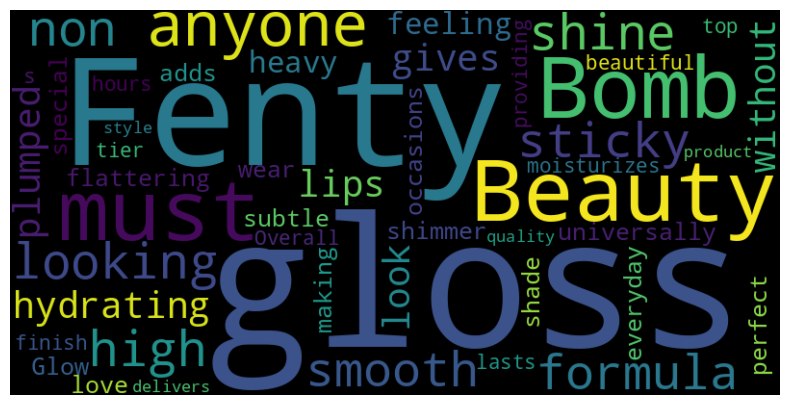

In [4]:
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt
#1
reviews = ['''The Fenty Beauty Gloss Bomb is a must-have for anyone looking for a high-shine, non-sticky gloss.
 Its formula is smooth, hydrating, and gives lips a plumped-up look without feeling heavy.
 The universally flattering shade, Fenty Glow, adds a subtle shimmer, making it perfect for both everyday wear and special occasions.
 I love how it moisturizes while providing a beautiful gloss finish that lasts for hours.
  Overall, it’s a top-tier product that delivers both quality and style!''']
positive_reviews = []
for(i,review) in enumerate(reviews):
  blob = TextBlob(review)
  polarity = blob.sentiment.polarity
  subjectivity = blob.sentiment.subjectivity
  print(f"Review: {review}")
  print(f"Polarity: {polarity}")
  print(f"Subjectivity: {subjectivity}")
  if polarity > 0.1:
      sentiment = "Positive"
      positive_reviews.append(review)
  elif polarity < -0.1:
      sentiment = "Negative"
  else:
      sentiment = "Neutral"
  print(f"Sentiment: {sentiment}")
  print("------------------------------------------------")

#3
all_positive_text = " ".join(positive_reviews)
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(all_positive_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Q6. Choose your own paragraph (~100 words) as training data.
1.	Tokenize text using Tokenizer() from keras.preprocessing.text
2.	Create input sequences and build a simple LSTM or Dense model
3.	Train the model and generate 2–3 new lines of text starting from any seed word you provide.


In [2]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
from keras.optimizers import Adam
import numpy as np
import random
# Import to_categorical
from tensorflow.keras.utils import to_categorical

# Paragraph
text = """Artificial intelligence has rapidly transformed industries across the globe,
revolutionizing how we approach problem-solving and decision-making.
From healthcare to finance, AI systems are being used to analyze vast amounts of data, uncover patterns,
and generate insights with unprecedented accuracy. Machine learning models, particularly deep learning architectures,
have demonstrated remarkable capabilities in image recognition, natural language processing, and predictive analytics.
However, as AI becomes more embedded in daily life, ethical concerns around bias, privacy,and accountability have also come to the forefront,
emphasizing the need for responsible development and deployment of these powerful technologies"""

# Tokenization
tokenizer = Tokenizer()
tokenizer.fit_on_texts([text])
total_words = len(tokenizer.word_index) + 1

# Create input sequences
input_sequences = []
for line in text.split("."):
    tokens = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(tokens)):
        n_gram_sequence = tokens[:i+1]
        input_sequences.append(n_gram_sequence)

# Pad sequences
max_sequence_len = max([len(seq) for seq in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# Create features and labels
X = input_sequences[:,:-1]
y = input_sequences[:,-1]
y = to_categorical(y, num_classes=total_words) # Now to_categorical is defined
print("--------------------------------------------------------------------")

model = Sequential()
# Change input_dim to total_words or a higher value
model.add(Embedding(input_dim=total_words, output_dim=10, input_length= input_sequences.shape[1]))
model.add(LSTM(50))
model.add(Dense(50, activation='relu'))
model.add(Dense(len(tokenizer.word_index)+1, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam')
model.summary()

print("--------------------------------------------------------------------------------")


def generate_lines(seed_text, total_lines=3, words_per_line=7):
    generated_text = ""
    current_seed = seed_text

    for _ in range(total_lines):
        line = ""
        for _ in range(words_per_line):
            token_list = tokenizer.texts_to_sequences([current_seed])[0]
            token_list = pad_sequences([token_list], maxlen=max_sequence_len - 1, padding='pre')
            predicted = model.predict(token_list, verbose=0)
            predicted_word_index = np.argmax(predicted, axis=1)[0]

            output_word = ""
            for word, index in tokenizer.word_index.items():
                if index == predicted_word_index:
                    output_word = word
                    break

            # Handle out-of-vocabulary words
            if output_word == "":
                output_word = "[OOV]"  # Replace with a placeholder or handle differently

            current_seed += " " + output_word
            line += output_word + " "
        generated_text += line.strip() + "\n"

    return generated_text

# Try generating 3 lines of text from a seed word
seed = "Technology"
print(generate_lines(seed))


--------------------------------------------------------------------


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

--------------------------------------------------------------------------------
to to to to to deployment deployment
powerful powerful across powerful across analyze across
powerful across powerful across analyze technologies across

